# Building Machine Learning Model
This Python 3 notebook is dedicated towards building the machine learning Model comparing the accuray of our Models. 

This notebook is the continuation or previous notebooks which can be found from the below links.

1.  Descriptive Statistics and Understanding our data :-  
https://github.com/kscholar/Descriptive-Statistics-and-understanding-the-Data

2. Data Visualisation and Understaning our data:- https://github.com/kscholar/Basic-Data-Visualisation-and-understand-our-data

3. Data Preparation and it's effect on Model Accuracy:- https://github.com/kscholar/Data-Transformation-and-it-s-effect-on-Model-Accuracy



DataSet Used in this Notebook is PIMA Indians Diabetes Dataset:-  https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [20]:
# Importing the Dataset 
from google.colab import files
uploaded = files.upload()
# This code sometimes takes twice to run Properly

Saving diabetes.csv to diabetes (1).csv


In [21]:
# Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set

<function seaborn.rcmod.set>

In [0]:
#Converting our file into Pandas DataFrame
Data = pd.read_csv('diabetes.csv')

In [23]:
#We will take a quick recap ou our Data
Data.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Variables present in our Dataset

1. Pregnancies Number of times pregnant.

2. GlucosePlasma glucose concentration a 2 hours in an oral glucose tolerance test.

3. BloodPressure Diastolic blood pressure (mm Hg)
4. SkinThickness Triceps skin fold thickness (mm)
5.  Insulin 2-Hour serum insulin (mu U/ml)
6. BMI Body mass index (weight in kg/(height in m)^2)
7. Diabetes Pedigree Function Diabetes pedigree function
8. Age Age of the patient (years)
9. Outcome Class variable or dependent variable (0 or 1) 268 of 768 are 1, the others are 0, Which means 268 out of the 768 had the diabetes and rest did not

# Building Classifiers and comparing the accuracy

In our previous note book We saw that our Data is pretty clean and does not needs much preparation and preprocessing.  As Diabetes Prediction is a Classification problem, We will now build classifiers and compare each of them.

Before building the Classifiers we will Split our Data into Training set ans test set.


In [0]:
from sklearn.model_selection import train_test_split
predicted_columns = ['Outcome']
feature_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = Data[feature_columns].values
Y = Data[predicted_columns].values
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33 , random_state=7)

In [25]:
#We will build the Logistic Regression Classifier 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
Logistic_Regression = classifier.score(X_test,Y_test)
Logistic_Regression

0.7874015748031497

In [27]:
# We Will also K-Nearest Neighbours Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
K_Neighbours = classifier.score(X_test,Y_test)
K_Neighbours

0.6929133858267716

In [29]:
# We will build Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
Naive_Bayes = classifier.score(X_test,Y_test)
Naive_Bayes

0.7440944881889764

In [31]:
# We will Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
Random_Forest = classifier.score(X_test,Y_test)
Random_Forest

0.7519685039370079

We have Obtained model scores of various Machine learning Classifiers. Now as a best practice we will try to visualise them.

We will prepare a list of modei score and prepare a horizontal bar chart to analyse them

In [0]:
score_list = [Logistic_Regression*100, K_Neighbours*100,Naive_Bayes*100,Random_Forest*100]

In [43]:
score_list

[78.74015748031496, 69.29133858267717, 74.40944881889764, 75.19685039370079]

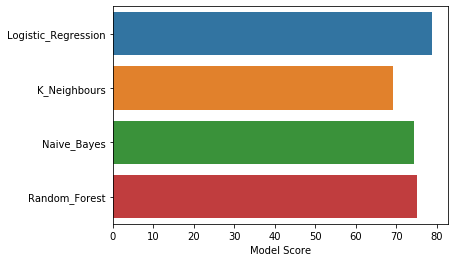

In [44]:
y_axis=['Logistic_Regression', 'K_Neighbours', 'Naive_Bayes','Random_Forest']
x_axis = score_list
sns.barplot(x=x_axis, y=y_axis)
plt.xlabel('Model Score')
plt.show()

# Key Takeaways 

While analysing our data , it is best practice to create a visualisation for the purpose of analysis. From the above bar plot we see that Logistic Regression gave us the highest model score on our dataset. This information will be helpful for us in the future When We will learn more about how to increase the accuracy of our model


In our next notebook we shall take a look at crossvalidation, Imbalanced dataset and other methods which we can use to gain more insights from our data. 